In [114]:
import pandas as pd

In [115]:
data = pd.read_csv('~/ML_Data/billionaires.csv')
data.head()

,name,rank,year,company.founded,company.name,company.relationship,company.sector,company.type,demographics.age,demographics.gender,...,location.gdp,location.region,wealth.type,wealth.worth in billions,wealth.how.category,wealth.how.from emerging,wealth.how.industry,wealth.how.inherited,wealth.how.was founder,wealth.how.was political
0,Bill Gates,1,1996,1975,Microsoft,founder,Software,new,40,male,...,8.100000e+12,North America,founder non-finance,18.5,New Sectors,True,Technology-Computer,not inherited,True,True
1,Bill Gates,1,2001,1975,Microsoft,founder,Software,new,45,male,...,1.060000e+13,North America,founder non-finance,58.7,New Sectors,True,Technology-Computer,not inherited,True,True
2,Bill Gates,1,2014,1975,Microsoft,founder,Software,new,58,male,...,0.000000e+00,North America,founder non-finance,76.0,New Sectors,True,Technology-Computer,not inherited,True,True
3,Warren Buffett,2,1996,1962,Berkshire Hathaway,founder,Finance,new,65,male,...,8.100000e+12,North America,founder non-finance,15.0,Traded Sectors,True,Consumer,not inherited,True,True
4,Warren Buffett,2,2001,1962,Berkshire Hathaway,founder,Finance,new,70,male,...,1.060000e+13,North America,founder non-finance,32.3,Traded Sectors,True,Consumer,not inherited,True,True


In [116]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2614 entries, 0 to 2613
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   name                      2614 non-null   object 
 1   rank                      2614 non-null   int64  
 2   year                      2614 non-null   int64  
 3   company.founded           2614 non-null   int64  
 4   company.name              2576 non-null   object 
 5   company.relationship      2568 non-null   object 
 6   company.sector            2591 non-null   object 
 7   company.type              2578 non-null   object 
 8   demographics.age          2614 non-null   int64  
 9   demographics.gender       2580 non-null   object 
 10  location.citizenship      2614 non-null   object 
 11  location.country code     2614 non-null   object 
 12  location.gdp              2614 non-null   float64
 13  location.region           2614 non-null   object 
 14  wealth.t

In [117]:
da, inh = 'demographics.age', 'wealth.how.inherited'

In [118]:
# Null Age data filtered
data = data[data[da] > 0]
data = data[data[da] < 90]

In [119]:
inh_uniq = data[inh].unique()
inh_uniq

array(['not inherited', 'father', 'spouse/widow', '3rd generation',
       '5th generation or longer', '4th generation'], dtype=object)

In [120]:
data_age_inh = data[[da, inh]]

In [121]:
inh_map = {}
for v in inh_uniq:
    if v=='not inherited':
        inh_map[v] = 0
    else:
        inh_map[v] = 1
inh_map

{'not inherited': 0,
 'father': 1,
 'spouse/widow': 1,
 '3rd generation': 1,
 '5th generation or longer': 1,
 '4th generation': 1}

In [122]:
# inherited filtered
data_age_inh[inh] = data_age_inh[inh].map(inh_map)

<ipython-input-122-3a8329f62c9e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_age_inh[inh] = data_age_inh[inh].map(inh_map)


In [123]:
data_age_inh.head()

,demographics.age,wealth.how.inherited
0,40,0
1,45,0
2,58,0
3,65,0
4,70,0


In [124]:
data_age_inh = data_age_inh.sort_values(by=da)

In [125]:
data_age_inh.corr()

,demographics.age,wealth.how.inherited
demographics.age,1.000000,0.005584
wealth.how.inherited,0.005584,1.000000


In [126]:
data_final = pd.DataFrame(data_age_inh.groupby(by=da).mean())
data_final.head()

,wealth.how.inherited
demographics.age,
12,1.0
21,1.0
24,1.0
28,1.0
29,0.5


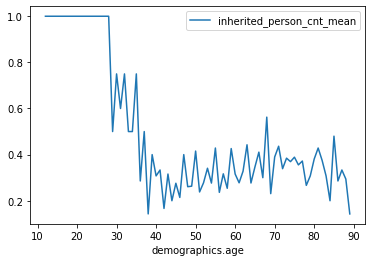

In [127]:
import matplotlib.pyplot as plt

data_final.plot()
plt.legend(['inherited_person_cnt_mean'])
plt.savefig('inherited_age_relationship.png')
plt.show()
